## Read the dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [4]:
df = pd.read_csv('~/Desktop/data/ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.shape

(294478, 5)

In [6]:
df['user_id'].nunique()

290584

This dataset has 290,584 unique users.

In [7]:
df.query('converted == "1"')['user_id'].nunique() / df['user_id'].count()

0.1194418598333322

The proportion os users converted is 0.12%

In [8]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

The number of times 'new page' and 'treatment' don't line up is 3893 times.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows in this dataset have missing values.

In [10]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page")').index)

Creating a new dataframe df2 which won't have any line up between 'new page' and 'treatment'

In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Double checking if all the rows were removed or not.

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
df2['user_id'].nunique()

290584

There are 290,584 unique user id's in df2.

In [14]:
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

This one user id is repeated in df2.

In [15]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2 = df2.drop(df2[(df2['user_id']==773192) & (df2['timestamp']=='2017-01-09 05:37:58.781806')].index)

df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df2.query('converted == "1"')['user_id'].count() / df.query('converted')['user_id'].count()

0.11801560727796304

The probability of user converting regardless of the page they receive is 11.8%

In [18]:
df2.query('(group == "control" and converted == "1")')['user_id'].count() / df2.query('group == "control"')['user_id'].count()

0.1203863045004612

Probability of user converting if they are in "control" group is 12%

In [19]:
df2.query('group == "treatment" and converted == "1"')['user_id'].count() / df2.query('group == "treatment"')['user_id'].count()

0.11880806551510564

Probability of user converting if they are in "treatment" group is 11.88%

In [21]:
df.query('landing_page == "new_page"')['user_id'].count() / df['user_id'].count()

0.5

Probability of user receiving new page is 50%

## A/B Test

                                        H_0 : p_old >= p_new

                                        H_1 : p_new > p_old

In [22]:
df2.query('landing_page == "new_page"')['user_id'].count()

145310

In [23]:
df2.query('landing_page == "old_page"')['user_id'].count()

145274

In [24]:
p_new = df2.query('converted == "1"')['user_id'].count() / df2['user_id'].count()

p_new


0.11959708724499628

In [25]:
p_old = df2.query('converted == "1"')['user_id'].count() / df2['user_id'].count()

p_old

0.11959708724499628

In [26]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

n_new

145310

In [27]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

n_old

145274

In [47]:
new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))

new_page_converted.mean()

0.8796091115546074

In [48]:
old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))

old_page_converted.mean()

0.8812795131957543

In [49]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()

obs_diff

-0.0016704016411468459

The observed difference between the simulated values of converted new page and converted old page is very small.

In [50]:
p_diffs = []
for _ in range(10000):
    new_page_mean = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
    old_page_mean = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
    p_diffs.append(new_page_mean.mean() - old_page_mean.mean())

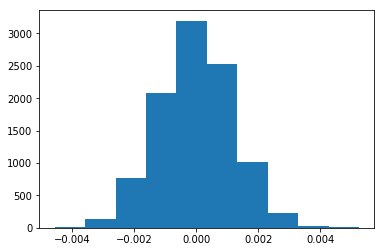

In [51]:
plt.hist(p_diffs);

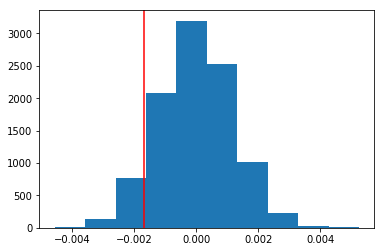

In [54]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='red');

In [53]:
(p_diffs>obs_diff).mean()

0.9144

The above value computed is known as the p-value which actually determines whether the we reject or fail to reject the null Hypothesis.
Here, since the p-value is 0.15 which is higher than the Type I error rate of 0.05, we fail to reject the null Hypothesis.
The new page is not better than the old page.
